# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-summer-foundation-machine-learning)



# Week 8
## Machine Learning: Neural Nets

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}



# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

# Feed Forward Networks:¶


In [2]:
def dot(X, Y):
    """
    A simple dot product on X, and Y
    
    Return the sum of the element-wise product of vectors X and Y.
    """
    return sum(x * y for x, y in zip(X, Y))

def add_vectors(a, b):
    """addition of two vectors by adding every component."""
    from operator import add
    return tuple(map(add, a, b))


def porduct_scalar_vector(X, Y):
    """Return vector as a product of a scalar and a vector"""
    return [X * y for y in Y]


def softmax(X, j):
    from math import exp
    d = sum([exp(x) for x in X])
    return exp(X[j])/d

def softmax_derivative(X, dj, i):
    if dj == i:
        return X[i] * (1 - X[j])
    else:
        return - X[i] * X[j]
        
def stablesoftmax(x):
    """Compute the softmax of vector x in a numerically stable way."""
    import numpy as np
    shiftx = x - np.max(x)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

def sigmoid(x):
    """Sigmoid function activation"""
    from math import exp
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        from numpy import exp
        return 1 / (1 + exp(-x))

def sigmoid_derivative(value):
    return value * (1 - value)



def rectified_LU(x):
    """
    Rectified Linear Unit (ReLU) activation
    """
    return max(0, x)

def rectified_LU_derivative(value):
    if value > 0:
        return 1
    else:
        return 0


    
def exponential_LU(x, alpha=0.01):
    """
    Exponential Linear Unit (ELU) activation
    """
    from math import exp
    if x > 0:
        return x
    else:
        return alpha * (exp(x) - 1)

    
def exponential_LU_derivative(value, alpha = 0.01):
    from math import exp
    if value > 0:
        return 1
    else:
        return alpha * exp(value) 
#########################
    
def tanh(x):
    """
    Hyperbolic tangent activation
    """
    from numpy import tanh
    return tanh(x)

def tanh_derivative(value):
    return (1 - (value ** 2))




def leaky_ReLU(x, alpha = 0.01):
    """
    Leaky Rectified Linear Unit activation
    """
    if x > 0:
        return x
    else:
        return alpha * x

def leaky_ReLU_derivative(value, alpha=0.01):
    if value > 0:
        return 1
    else:
        return alpha



def step(x):
    """sign function activation """
    return 1 if x >= 0 else 0



def find_max_neuron(neurons):
    return neurons.index(max(neurons, key=lambda neuron: neuron.value))

def find_softmax(neurons):
    vals = [neuron.value for neuron in neurons]
    softmax_list = [softmax(vals, i) for i in range(len(vals))]
    return softmax_list



def random_weights(min_value, max_value, num_weights):
    from random import uniform
    return [uniform(min_value, max_value) for _ in range(num_weights)]


def initilize_examples(examples, idx_inputs, idx_output, output_neurons):
    """
    Initialize the examples and find the inputs and modidied output 
    
    If the output has N distinct classes the output will be:
    
    an array of lenght N:
    
        [0, 0, 0, 0, ..., 1, ..., 0, 0]
        1 is at j which is a number associated with our classes  

    """
    # a dictionary for putting the inputs and outputs 
    inputs, outputs = {}, {}
    
    # Finding a list of output values (str, int, float)
    values = [example[idx_output] for example in examples]
    
    # Find the distinct values, which are our classes
    # Remmeber that for float values this cannot be 
    # an effient classifications if the variety of the 
    # values is large
    classes = list(set(values))
    print("The starting classes are: ", classes) 
    
    # Go through every example in the list of examples
    for i, example in enumerate(examples):
        # find the input values of i'th example 
        inputs[i] = [example[j] for j in idx_inputs]
        
        # if we have more than one neuron for output
        if output_neurons > 1:
            # Check whether the number of output neurons
            # and classes are the same
            assert output_neurons == len(classes), "Number of classes {} is not equal \
            to Number of output neurons {}".format(len(classes), output_neurons)
            
            # Go through different classes and find the 
            # one for this example, and assign a number 
            # to it
            for j, class_ in enumerate(classes):
                if example[idx_output]==class_:
                    example[idx_output] = j
            
            # One-Hot representation of example's output
            t = [0 for i in range(output_neurons)]
            t[example[idx_output]] = 1
            outputs[i] = t
        else:
            # Output value of example
            outputs[i] = [example[idx_output]]
            
    print("The assigned classes are: ", list(range(len(classes)))) 
    return inputs, outputs



# import only system from os 
from os import system, name 
  
# define our clear function 
def clear(): 
  
    # for windows 
    if name == 'nt': 
        _ = system('cls') 
  
    # for mac and linux(here, os.name is 'posix') 
    else: 
        _ = system('clear')

In [3]:
class Neuron:
    """
    Single Unit of Multiple Layer Neural Network
    
    inputs: Incoming connections
    weights: Weights to incoming connections
    """

    def __init__(self, activation=sigmoid, weights=None, inputs=None, layer=None, number=None):
        self.weights = weights or []
        self.inputs = inputs or []
        self.value = None
        self.activation = activation
        self.layer = layer 
        self.num = number
        
        
        
class Network:
    def __init__(self, input_neurons, hidden_layer_sizes, output_neurons, activation=sigmoid):
        network_layers_sizes = [input_neurons] + hidden_layer_sizes + [output_neurons]
        self.size = network_layers_sizes
        
        network = []
        for i,layer_size in enumerate(network_layers_sizes):
            layer = []
            for j in range(layer_size):
                layer.append(Neuron(activation, layer=i, number=j))
            network.append(layer)  
        self.network = network
        self.make_connections()
        self.hidden_layers = network[1:-1]
        self.input_layer = network[0]
        self.output_layer = network[-1]
        
        
        
    def make_connections(self):
        number_of_layers = len(self.network)
        # Make Connection between nodes in layers 
        # Going thorough layer i > 0
        for i in range(1, number_of_layers):
            # Going through every neurons in the  layer (i)
            for neuron_1 in self.network[i]:
                # Going through every neurons in the layer (i-1)
                 for neuron_2 in self.network[i-1]:
                    neuron_1.inputs.append(neuron_2)
                    neuron_1.weights.append(0)

In [4]:
def network(input_neurons, hidden_layer_sizes, output_neurons, activation=sigmoid):
    """
    Making a directed acyclic network of given number layers.
    
    input_neurons : 
    hidden_layers_sizes : List number of neuron units in each hidden layer
    excluding input and output layers
    """
    
    network_layers_sizes = [input_neurons] + hidden_layer_sizes + [output_neurons]
    
    network = []
    for layer_size in network_layers_sizes:
        layer = []
        for i in range(layer_size):
            layer.append(Neuron(activation))
        network.append(layer)
    
    number_of_layers = len(network)
    
    # Make Connection between neurons in layers 
    # Going thorough layer i > 0
    for i in range(1, number_of_layers):
        # Going through every neurons in the  layer (i)
        for neuron_1 in network[i]:
            # Going through every neurons in the layer (i-1)
             for neuron_2 in network[i-1]:
                neuron_1.inputs.append(neuron_2)
                neuron_1.weights.append(0)
    return network


def random_weights(min_value, max_value, num_weights):
    from random import uniform
    return [uniform(min_value, max_value) for _ in range(num_weights)]


def BackPropagationLearner(dataset, network, learning_rate, epochs, activation=sigmoid, record=False):
    """The back-propagation algorithm for multilayer networks from:
    Aritificial Intelligence: A modern approach by Russell And Norvig,  chapter 18

    function  BackPropagationLearner (examples, network ) 
              returns a neural network
              
    inputs: examples, a set of examples, each with input   vector x  and output
            vector y network , a multilayer network with L layers, weights w_ij
            and activation function of g
            
    local variables: Δ, a vector of errors, indexed by network neurons
    
    repeat
            for each weight wi,j in network do
                wi,j ← a small random number
            
            for each example (x, y) in examples do
                # Propagate the inputs forward to compute the outputs 
                for each neuron i in the input layer do
                    ai = xi
                for l = 2 to L do
                    for each neuron j in layer l do
                        value_j = Σ_i w_ij ai
                        aj = g(value_j)
                
                # Propagate deltas backward from output layer to input layer 
                for each neuron j in the output layer do
                    Δ[j] = g'( value_j ) × (yj − aj )


                for l = L − 1 to 1 do
                    for each neuron i in layer l do
                        Δ[i] = g'(in i ) Σ_j w_ij Δ[j]
                
                # Update every weight in network using deltas 
                
                for each weight w_ij in network do
                    w_ij = w_ij + α × ai × Δ[j]
                    
    until some stopping criterion is satisfied
    return network

    
    """
    from numpy import dot
    # Initialise weights
    for layer in network:
        for neuron in layer:
            neuron.weights = random_weights(min_value=-0.5, max_value=0.5,
                                            num_weights=len(neuron.weights))

    examples = dataset.examples

    # Find the input/output layers
    output_layer = network[-1]
    input_layer = network[0]

    # Find the number of output neurons
    output_neurons = len(output_layer)
    
    # Find the indices for inputs and outputs
    idx_output = dataset.target_attribute
    idx_inputs = dataset.input_attributes
    
    # Find the number of layers
    number_of_layers = len(network)
    
    # inputs, outputs from examples
    inputs, targets = initilize_examples(examples, idx_inputs, 
                                         idx_output, output_neurons)

    _network_record_keeper = {}
    
    # going through different epoch of learning
    for epoch in range(epochs):
        # Save the network at every epoch if record==True
        if record:
            _network_record_keeper[epoch] = Network
        # Iterate over each example
        for i in range(len(examples)):
            input_values = inputs[i]
            target = targets[i]

            # Activate the input layer
            for value, neuron in zip(input_values, input_layer):
                neuron.value = value

            # Forward pass and activate neurons
            for layer in network[1:]:
                for neuron in layer:
                    input_values_list = [n.value for n in neuron.inputs]
                    dot0 = dot(input_values_list, neuron.weights)
                    neuron.value = neuron.activation(dot0)

            # Initialize delta for storing the errors
            delta = [[] for _ in range(number_of_layers)]

            # Compute last layer's error (Δ_k/)
            # Error for the Mean Squared Error (MSE) cost function
            error = [target[i] - output_layer[i].value for i in range(output_neurons)]

            # Calculate delta at output with different activation functions
            # =======
            # Sigmoid 
            if neuron.activation == sigmoid:
                delta[-1] = [sigmoid_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            # rectified_LU 
            elif neuron.activation == rectified_LU:
                delta[-1] = [rectified_LU_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            # Hyperbolic tangent      
            elif neuron.activation == tanh:
                delta[-1] = [tanh_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            # Exponential_LU 
            elif neuron.activation == exponential_LU:
                delta[-1] = [exponential_LU_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            else:
                delta[-1] = [leaky_ReLU_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]


            # Find the number of hidden layers
            number_of_hidden_layers = number_of_layers - 2
            
            # Going Backward (Back propagation)
            for i in range(number_of_hidden_layers, 0, -1):
                # what is the current layer
                layer = network[i]
                # Find number of neurons at this layer
                number_of_neurons = len(layer)
                # Find the next layer
                next_layer = network[i+1]

                # weights from each of layer (i) neurons to each layer (i + 1) neurons
                w = [[neuron.weights[k] for neuron in next_layer] for k in range(number_of_neurons)]

                # Calculate delta at output with different activation functions
                if activation == sigmoid:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = sigmoid_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err

                elif activation == rectified_LU:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = sigmoid_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err
                    
                elif activation == tanh:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = tanh_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err

                elif activation == exponential_LU:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = exponential_LU_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err
                    
                else: # Use the leaky ReLU activation function 
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = leaky_ReLU_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err

            #  Now that we have all the deltas let's update our weights
            for i in range(1, number_of_layers):
                layer = network[i]
                previous_layer_values = [neuron.value for neuron in network[i-1]]
                number_of_neurons = len(layer)
                
                for j in range(number_of_neurons):
                    # updates vector with the lenght of the previous layers
                    updates = porduct_scalar_vector(learning_rate * delta[i][j],
                                                    previous_layer_values)
                    
                    # updates every neurons's weights vector 
                    layer[j].weights = add_vectors(layer[j].weights, updates)
                    

    if record:
        return _network_record_keeper
    else:
        return network


In [5]:
def Neural_Net_Learner(dataset, 
                       hidden_layer_sizes=[3],
                       learning_rate=0.01, 
                       epochs=100, 
                       activation=sigmoid, 
                       softmax_output=False,):
    
    """
    Layered feed-forward network.
    hidden_layer_sizes: List of number of hidden units per hidden layer
    learning_rate: Learning rate of gradient descent
    epochs: Number of passes over the dataset
    """
    
    # Find the number of input and output neurons based on the dataset
    input_neurons = len(dataset.input_attributes)
    output_neurons = len(dataset.values[dataset.target_attribute])

    # Construct a network with intial random
    intital_network = network(input_neurons,
                              hidden_layer_sizes, 
                              output_neurons,
                              activation)
    
    learned_network = BackPropagationLearner(dataset, 
                                             intital_network,
                                             learning_rate, 
                                             epochs,
                                             activation,)
                                             

    def predict(example):
        # Input neurons
        input_neurons = learned_network[0]

        # Activate input layer
        for value, neuron in zip(example, input_neurons):
            neuron.value = value

        # Forward pass through the layers
        for layer in learned_network[1:]:
            # going through every neuron in layer
            for neuron in layer:
                input_values_list = [n.value for n in neuron.inputs]
                dot0 = dot(input_values_list, neuron.weights)
                neuron.value = neuron.activation(dot0)

        # Hypothesis prediction
        output_neurons = learned_network[-1]
        if softmax_output:
            prediction = find_softmax(output_neurons)
        else:
            prediction = find_max_neuron(output_neurons)
        return prediction

    return predict

In [7]:
from Data_Set import Data_Set

In [8]:
centers = [[-2, -2], [5, 5]]
sigma = 2
size = [500, 50]

np.random.seed(12)

x0 = centers[0][0] + sigma * np.random.randn(size[0])
y0 = centers[0][1] + sigma * np.random.randn(size[0])

x1 = centers[1][0] + np.random.randn(size[1])
y1 = centers[1][1] + np.random.randn(size[1])

examples=[]
for i in range(size[0]):
    example0 = [x0[i], y0[i], "r"]
    examples.append(example0)
for i in range(size[1]):
    example1 = [x1[i], y1[i], "b"]
    examples.append(example1)


Mock_data = Data_Set(examples, target_attribute=2)

In [9]:
NN_learner = Neural_Net_Learner(Mock_data, hidden_layer_sizes=[2], learning_rate=0.03, activation=tanh, epochs=100)

The starting classes are:  ['b', 'r']
The assigned classes are:  [0, 1]


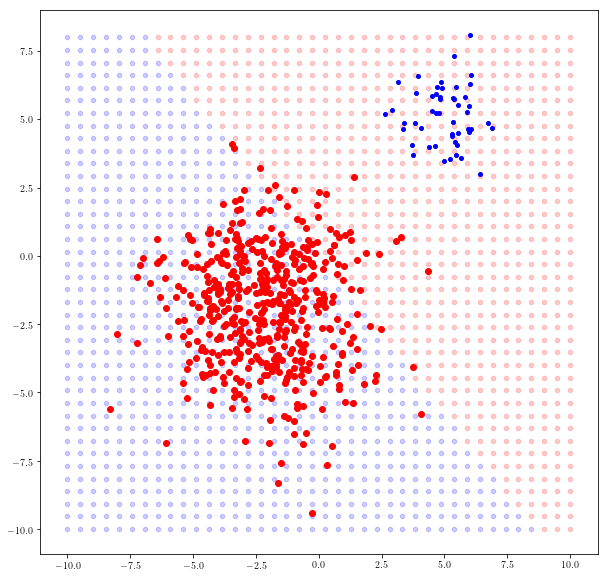

In [10]:

# plot the predictions
x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 8, 40)
x, y = np.meshgrid(x, y)

x = x.ravel()
y = y.ravel()

X_testing = np.c_[x, y]

color = ["r", "b"]

plt.figure(figsize=(10,10))
for X in X_testing:
    prediction = NN_learner(X)
    plt.scatter(X[0], X[1], c=color[prediction], s = 20, alpha=0.2)
    
plt.plot(x0, y0, "r.", markersize=12)
plt.plot(x1, y1, "b.", markersize=8)

plt.show()


In [11]:
centers = [[-2, -2], [5, 5]]
sigma = 3
size = 50

np.random.seed(12)

x0 = centers[0][0] + sigma * np.random.randn(size)
y0 = centers[0][1] + sigma * np.random.randn(size)

x1 = centers[1][0] + np.random.randn(size)
y1 = centers[1][1] + np.random.randn(size)

examples=[]
for i in range(size):
    example0 = [x0[i], y0[i], "r"]
    example1 = [x1[i], y1[i], "b"]
    examples.append(example0)
    examples.append(example1)
    

Mock_data = Data_Set(examples, target_attribute=2)

In [12]:
NN_learner = Neural_Net_Learner(Mock_data, hidden_layer_sizes=[8], learning_rate=0.03, activation=sigmoid, epochs=100)

The starting classes are:  ['b', 'r']
The assigned classes are:  [0, 1]


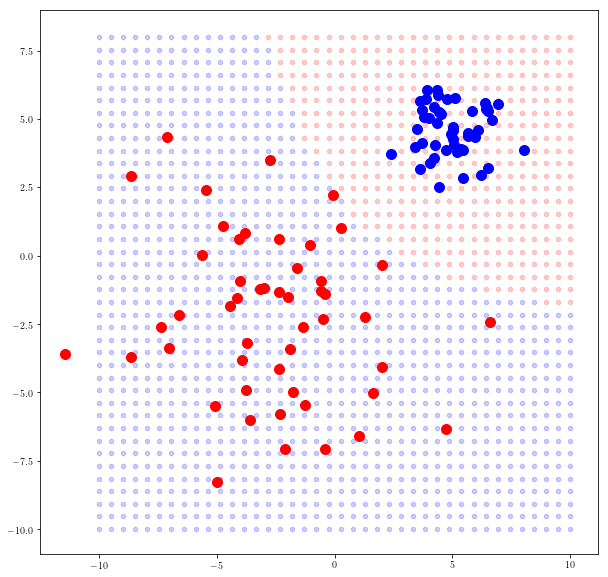

In [13]:
# plot the predictions
x = np.linspace(-10, 10, 40)
y = np.linspace(-10, 8, 40)
x, y = np.meshgrid(x, y)

x = x.ravel()
y = y.ravel()

X_testing = np.c_[x, y]

color = ["r", "b"]

plt.figure(figsize=(10,10))
for X in X_testing:
    prediction = NN_learner(X)
    plt.scatter(X[0], X[1], c=color[prediction], s = 20, alpha=0.2)
    
plt.plot(x0, y0, "r.", markersize=20)
plt.plot(x1, y1, "b.", markersize=20)

plt.show()

The starting classes are:  ['b', 'r']
The assigned classes are:  [0, 1]


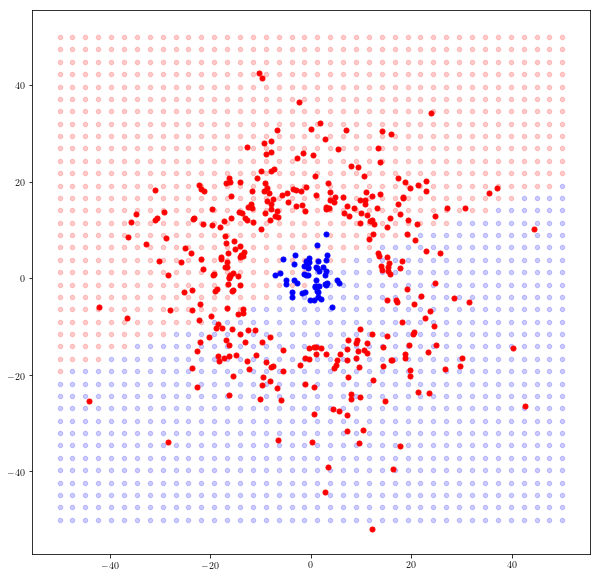

In [14]:
centers = [[0, 0], [0, 0]]
sigma = 14
size = [500, 50]

np.random.seed(12)

x0 = centers[0][0] + sigma * np.random.randn(size[0])
y0 = centers[0][1] + sigma * np.random.randn(size[0])

ring = x0**2 + y0**2 > sigma**2
x0 = x0[ring]
y0 = y0[ring]

x1 = centers[1][0] + 3 * np.random.randn(size[1])
y1 = centers[1][1] + 3 * np.random.randn(size[1])

examples=[]
for i in range(len(x0)):
    example0 = [x0[i], y0[i], "r"]
    examples.append(example0)
    
for i in range(size[1]):
    example1 = [x1[i], y1[i], "b"]
    examples.append(example1)

Mock_data = Data_Set(examples, target_attribute=2)

NN_learner = Neural_Net_Learner(Mock_data, hidden_layer_sizes=[8, 8, 8], learning_rate=0.02, activation=tanh, epochs=200)

# plot the predictions
x = np.linspace(-50, 50, 40)
y = np.linspace(-50, 50, 40)
x, y = np.meshgrid(x, y)

x = x.ravel()
y = y.ravel()

X_testing = np.c_[x, y]

color = ["b", "r"]

plt.figure(figsize=(10,10))
for X in X_testing:
    prediction = NN_learner(X)
    plt.scatter(X[0], X[1], c=color[prediction], s = 20, alpha=0.2)
    
plt.plot(x0, y0, "r.", markersize=10)
plt.plot(x1, y1, "b.", markersize=10)

plt.show()


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

/home/abtin/Documents/my_virt_envs/phys_py3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


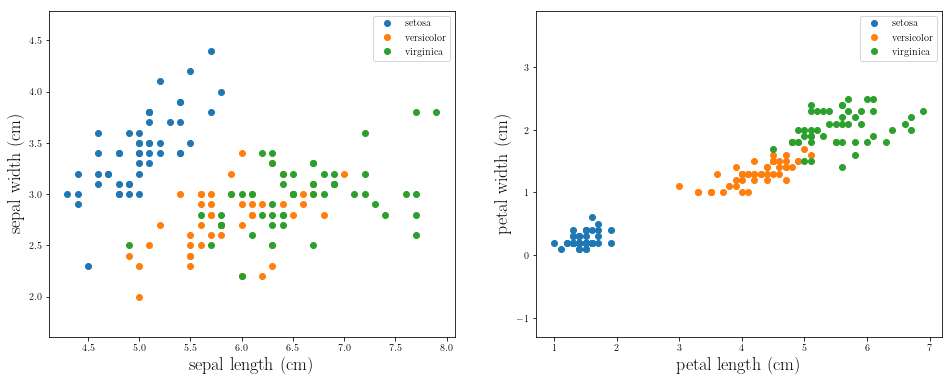

In [16]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

In [17]:
def one_hot_encoder(outputs):
    # find the distinct outputs
    distinct = list(set(outputs))
    # build a template 
    t = [0 for _ in distinct]
    encoded_list = []
    classes_list = [] 
    # go through every outputs' elements
    for output in outputs:
        t = [0 for _ in distinct]
        for i, d in enumerate(distinct):
            if output == d:
                t0 = t
                t0[i] = 1
                encoded_list.append(t0)
                classes_list.append(output)
                continue
    return encoded_list, classes_list

In [19]:
from keras.models import Sequential
from keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 27        
Total pa

In [20]:
X_train.shape


(75, 4)

In [21]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]


Model name: model1
Instructions for updating:
Use tf.cast instead.
Test loss: 0.5294226900736491
Test accuracy: 0.92
Model name: model2
Test loss: 0.20982347498337428
Test accuracy: 0.92
Model name: model3
Test loss: 0.14743891616662344
Test accuracy: 0.9333333333333333


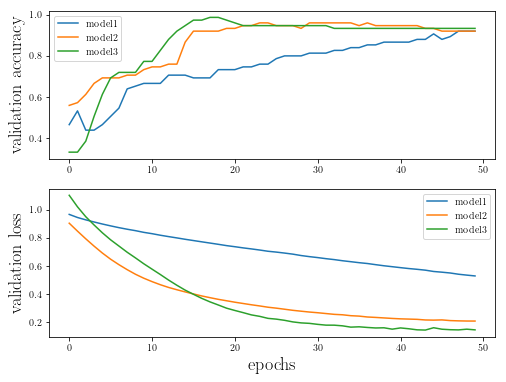

In [22]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel(r'validation accuracy')
ax2.set_ylabel(r'validation loss')
ax2.set_xlabel(r'epochs')
ax1.legend()
ax2.legend()
plt.show()

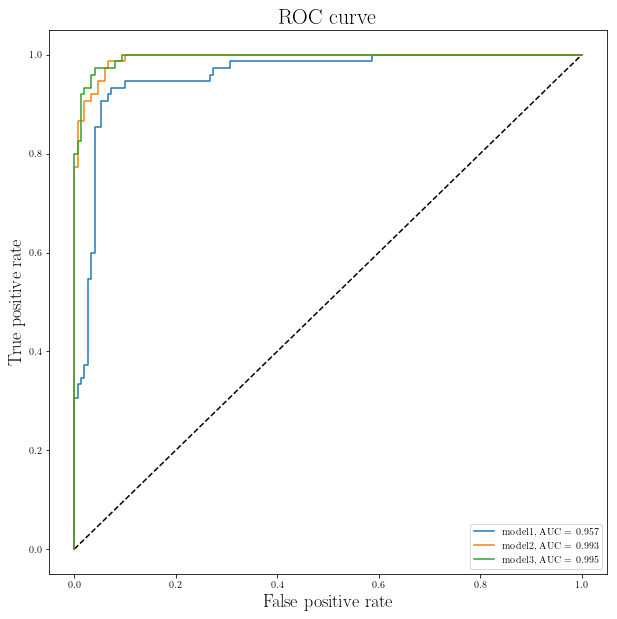

In [23]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_model_network(n_features, n_classes, 8, 3)

estimator = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
scores = cross_val_score(estimator, X_scaled, Y, cv=10)
print("Accuracy : {:0.2f} (+/- {:0.2f})".format(scores.mean(), scores.std()))